<a href="https://colab.research.google.com/github/KhaiHoanNinh/bt_AI/blob/main/nhandien1nguoiipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [4]:
#get data
with open('Nhandien1nguoi.pickle', 'rb') as f:
# Reshape Data
  (x_train, y_train),(x_test, y_test) = pickle.load(f)
x_pre = x_test
x_pre1 = y_test
x_train = x_train[:194] #299 la 3 anh
y_train = y_train[:194]
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [5]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255
# Encoding Y
y_train = np_utils.to_categorical(y_train, 2)
# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)
x_train[0]

array([0.9254902 , 0.9490196 , 0.92941177, ..., 0.83137256, 0.8352941 ,
       0.85490197], dtype=float32)

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (67500,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Epoch 1/50
2/2 [==============================] - 1s 230ms/step - loss: 7.3854 - acc: 0.4583 - val_loss: 12.1185 - val_acc: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 58ms/step - loss: 9.8485 - acc: 0.5000 - val_loss: 1.8752 - val_acc: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 51ms/step - loss: 1.2615 - acc: 0.7083 - val_loss: 2.4250 - val_acc: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 50ms/step - loss: 1.9059 - acc: 0.5000 - val_loss: 0.0359 - val_acc: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0347 - acc: 1.0000 - val_loss: 0.0347 - val_acc: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 51ms/step - loss: 0.0364 - acc: 1.0000 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 49ms/step - loss: 0.0165 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 8/50
2/2 [==============================] - 0s 58ms/step - loss: 0.0036 - acc: 1.0000 - v

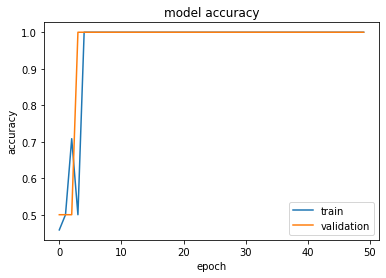

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

(150, 150, 3)
[0]


'Đây là Bạn Hoàn'

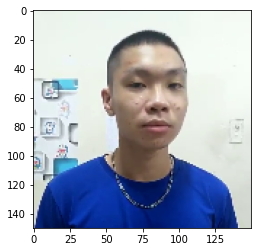

In [8]:
test = 15
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Bạn Hoàn', 'Đây không phải Bạn Hoàn']
Label[pred[0]]

(150, 150, 3)
[1]


'Đây không phải Bạn Hoàn'

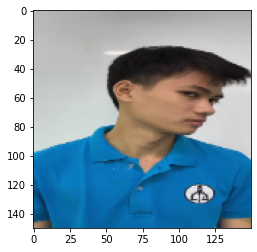

In [9]:
test = 150
plt.imshow(cv2.cvtColor(x_pre[test], cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Bạn Hoàn', 'Đây không phải Bạn Hoàn']
Label[pred[0]]